<a id='import_packages'></a>
# 1. Import Packages

In [26]:
# Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits 

<a id='load_data'></a>
# 2. Load Data

In [4]:
# Reading German Credit Data 
raw_data = pd.read_csv(r"F:\Paython\python_class_practice\German_Credit_data.csv")
raw_data.head()

,Creditability,Status_of_existing_account,Duration_of_Credit_month,Payment_Status_of_Previous_Credit(Credit_history),Purpose_of_loan,Credit_Amount,Value_of_Savings_account&bonds,Years_of_Present_Employment,Percentage_of_disposable_income,Sex_&_Marital_Status,...,Duration_in_Present_Residence,Property,Age_in_years,Concurrent_Credits,Housing,No_of_Credits_at_this__Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


<a id='data_preparation'></a>
# 3. Data Preparation
The process of data preparation entails cleansing, structuring and integrating data to make it ready for analysis. Here we first analyze the data statistically and then split the target varibles and normalize, followed by splitting the dataframe into numerical and categorical features.

<a id='data_dimension'></a>
# 3.1 Dimensions of Dataset
We get a quick idea of how many instances (rows) and how many attributes (columns) the data contains with the shape property.

In [5]:
# Shape
raw_data.shape

(1000, 21)

<a id='Stat_sum'></a>
# 3.2 Statistical Summary
Here we take a look at the summary of each attribute.

This includes the count, mean, the min and max values as well as percentiles.

In [6]:
# descriptions

raw_data.describe()

,Creditability,Status_of_existing_account,Duration_of_Credit_month,Payment_Status_of_Previous_Credit(Credit_history),Purpose_of_loan,Credit_Amount,Value_of_Savings_account&bonds,Years_of_Present_Employment,Percentage_of_disposable_income,Sex_&_Marital_Status,...,Duration_in_Present_Residence,Property,Age_in_years,Concurrent_Credits,Housing,No_of_Credits_at_this__Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


<a id='check_data_type'></a>
## 3.3 Checking Data Type and Missing Values 

In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
Creditability                                        1000 non-null int64
Status_of_existing_account                           1000 non-null int64
Duration_of_Credit_month                             1000 non-null int64
Payment_Status_of_Previous_Credit(Credit_history)    1000 non-null int64
Purpose_of_loan                                      1000 non-null int64
Credit_Amount                                        1000 non-null int64
Value_of_Savings_account&bonds                       1000 non-null int64
Years_of_Present_Employment                          1000 non-null int64
Percentage_of_disposable_income                      1000 non-null int64
Sex_&_Marital_Status                                 1000 non-null int64
Guarantors/Debtors                                   1000 non-null int64
Duration_in_Present_Residence                        1000 non-null int64
Property          

There are only 1000 rows in the raw_data data frame and there is no missing values

<a id='exploratory_data_analysis'></a>
# 4. Exploratory Data Analysis

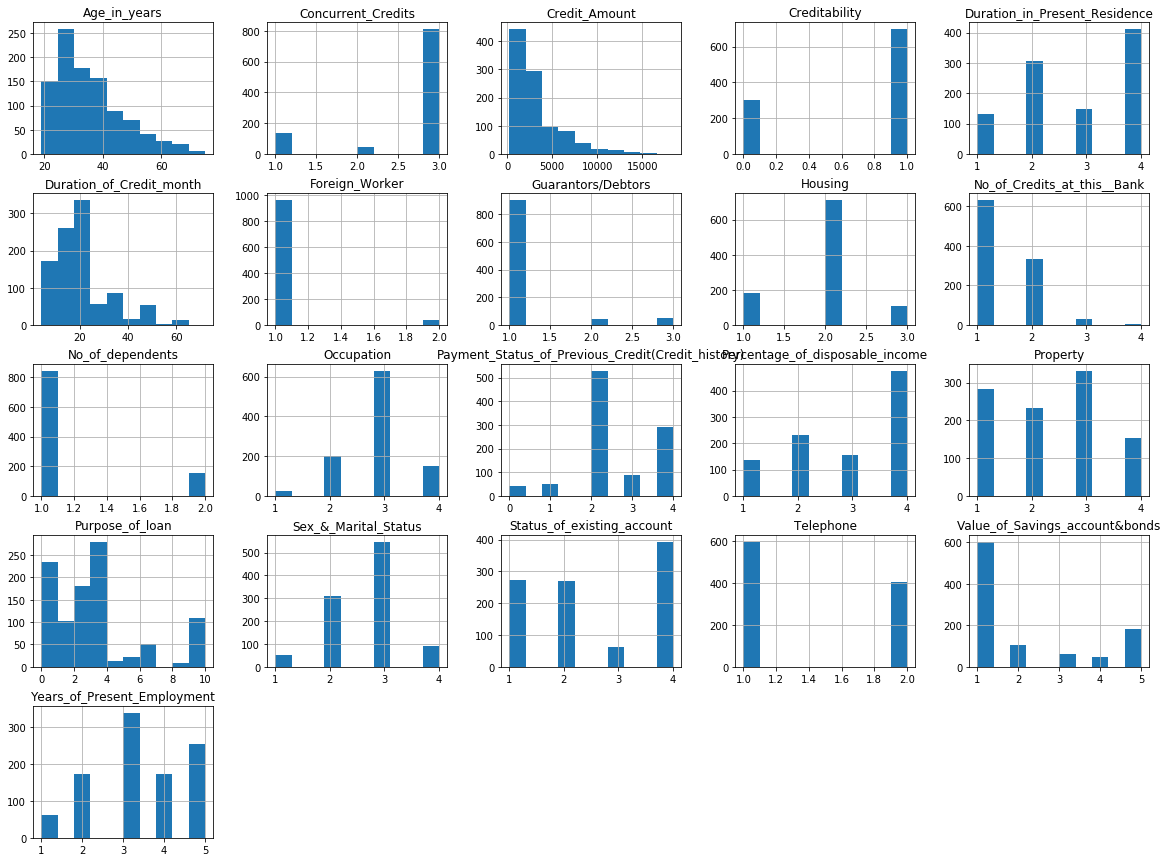

In [8]:
raw_data.hist(figsize=(20,15))
plt.show()

By visualizing the histogram of each variable, we can see "Age_in_years" and "Credit Amount" are not normally distributed. We have to treat those variable before building a model.

In [9]:
# To understand number of levels in each variables 
raw_data.nunique()

Creditability                                          2
Status_of_existing_account                             4
Duration_of_Credit_month                              33
Payment_Status_of_Previous_Credit(Credit_history)      5
Purpose_of_loan                                       10
Credit_Amount                                        923
Value_of_Savings_account&bonds                         5
Years_of_Present_Employment                            5
Percentage_of_disposable_income                        4
Sex_&_Marital_Status                                   4
Guarantors/Debtors                                     3
Duration_in_Present_Residence                          4
Property                                               4
Age_in_years                                          53
Concurrent_Credits                                     3
Housing                                                3
No_of_Credits_at_this__Bank                            4
Occupation                     

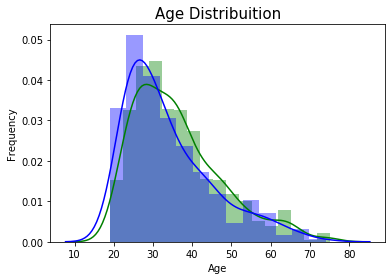

In [10]:
# Ploting Age Distribution
df_good = raw_data[raw_data["Creditability"] == 1]
df_bad = raw_data[raw_data["Creditability"] == 0]

sns.distplot(df_good["Age_in_years"], color="g")
sns.distplot(df_bad["Age_in_years"],  color='b')
plt.title("Age Distribuition", fontsize=15)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

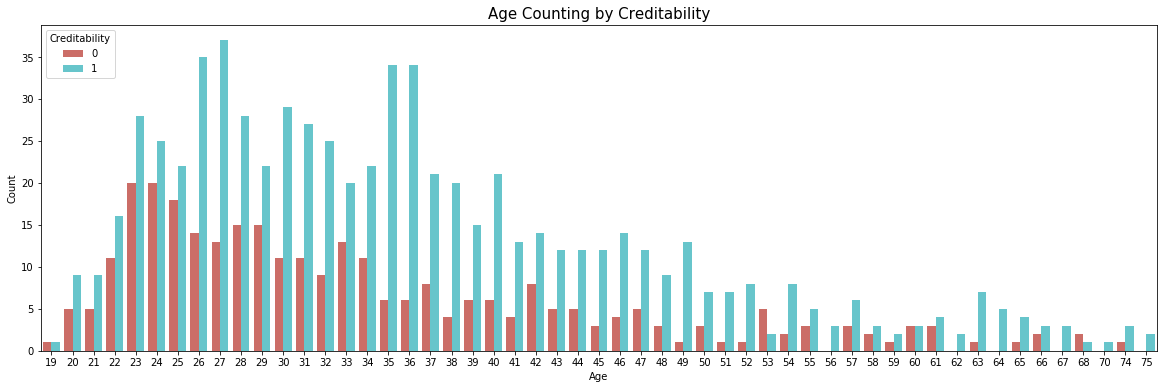

In [11]:
# import matplotlib
# sns.set(rc={'figure.figsize':(20,6)})
plt.figure(figsize=(20, 6))
sns.countplot(x="Age_in_years",data=raw_data, 
              palette="hls", 
              hue = "Creditability")
plt.title("Age Counting by Creditability", fontsize=15)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

<a id='class_distribution'></a>
# 4.1 Class Distribution
Let’s now take a look at the number of instances (rows) that belong to each class. We can view this as an absolute count.

In [12]:
print(raw_data.groupby('Creditability').size())

Creditability
0    300
1    700
dtype: int64


In [13]:
# This give you the calulation of the target lebels. Which category of the target lebel is how many percentage.
total_len = len(raw_data['Creditability'])
percentage_labels = (raw_data['Creditability'].value_counts()/total_len)*100
percentage_labels

1    70.0
0    30.0
Name: Creditability, dtype: float64

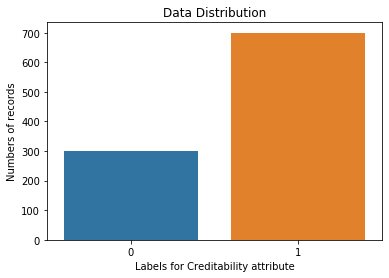

In [14]:
# Graphical representation of the target label percentage.
sns.countplot(raw_data['Creditability']).set_title('Data Distribution')
plt.xlabel("Labels for Creditability attribute")
plt.ylabel("Numbers of records")
plt.show()

<a id='Correlation'></a>
# 4.2 Correlation 

In [15]:
# Check Correlation
raw_data.corr()

,Creditability,Status_of_existing_account,Duration_of_Credit_month,Payment_Status_of_Previous_Credit(Credit_history),Purpose_of_loan,Credit_Amount,Value_of_Savings_account&bonds,Years_of_Present_Employment,Percentage_of_disposable_income,Sex_&_Marital_Status,...,Duration_in_Present_Residence,Property,Age_in_years,Concurrent_Credits,Housing,No_of_Credits_at_this__Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
Creditability,1.000000,0.350847,-0.214927,0.228785,-0.017979,-0.154740,0.178943,0.116002,-0.072404,0.088184,...,-0.002967,-0.142612,0.091272,0.109844,0.018119,0.045732,-0.032735,0.003015,0.036466,0.082079
Status_of_existing_account,0.350847,1.000000,-0.072013,0.192191,0.028783,-0.042695,0.222867,0.106339,-0.005280,0.043261,...,-0.042234,-0.032260,0.058631,0.068274,0.023335,0.076005,0.040663,-0.014145,0.066296,-0.035187
Duration_of_Credit_month,-0.214927,-0.072013,1.000000,-0.077186,0.147492,0.624988,0.047661,0.057381,0.074749,0.014789,...,0.034067,0.303971,-0.037550,-0.062884,0.153126,-0.011284,0.210910,-0.023834,0.164718,-0.134680
Payment_Status_of_Previous_Credit(Credit_history),0.228785,0.192191,-0.077186,1.000000,-0.090336,-0.059915,0.039058,0.138225,0.044375,0.042171,...,0.063198,-0.053777,0.146337,0.159957,0.061428,0.437066,0.010350,0.011550,0.052370,0.028554
Purpose_of_loan,-0.017979,0.028783,0.147492,-0.090336,1.000000,0.068480,-0.018684,0.016013,0.048369,0.000157,...,-0.038221,0.010966,-0.000892,-0.100230,0.013495,0.054935,0.008085,-0.032577,0.078371,-0.113244
Credit_Amount,-0.154740,-0.042695,0.624988,-0.059915,0.068480,1.000000,0.064632,-0.008376,-0.271322,-0.016094,...,0.028917,0.311602,0.032273,-0.069392,0.133024,0.020785,0.285393,0.017144,0.277000,-0.030662
Value_of_Savings_account&bonds,0.178943,0.222867,0.047661,0.039058,-0.018684,0.064632,1.000000,0.120950,0.021993,0.017349,...,0.091424,0.018948,0.083434,0.001908,0.006644,-0.021644,0.011709,0.027514,0.087208,0.010450
Years_of_Present_Employment,0.116002,0.106339,0.057381,0.138225,0.016013,-0.008376,0.120950,1.000000,0.126161,0.111278,...,0.245081,0.087187,0.259116,-0.007279,0.115077,0.125791,0.101225,0.097192,0.060518,-0.022845
Percentage_of_disposable_income,-0.072404,-0.005280,0.074749,0.044375,0.048369,-0.271322,0.021993,0.126161,1.000000,0.119308,...,0.049302,0.053391,0.057271,0.007894,0.091229,0.021669,0.097755,-0.071207,0.014413,-0.094762
Sex_&_Marital_Status,0.088184,0.043261,0.014789,0.042171,0.000157,-0.016094,0.017349,0.111278,0.119308,1.000000,...,-0.027269,-0.006940,0.005150,-0.026747,0.098934,0.064672,-0.011956,0.122165,0.027275,0.073103


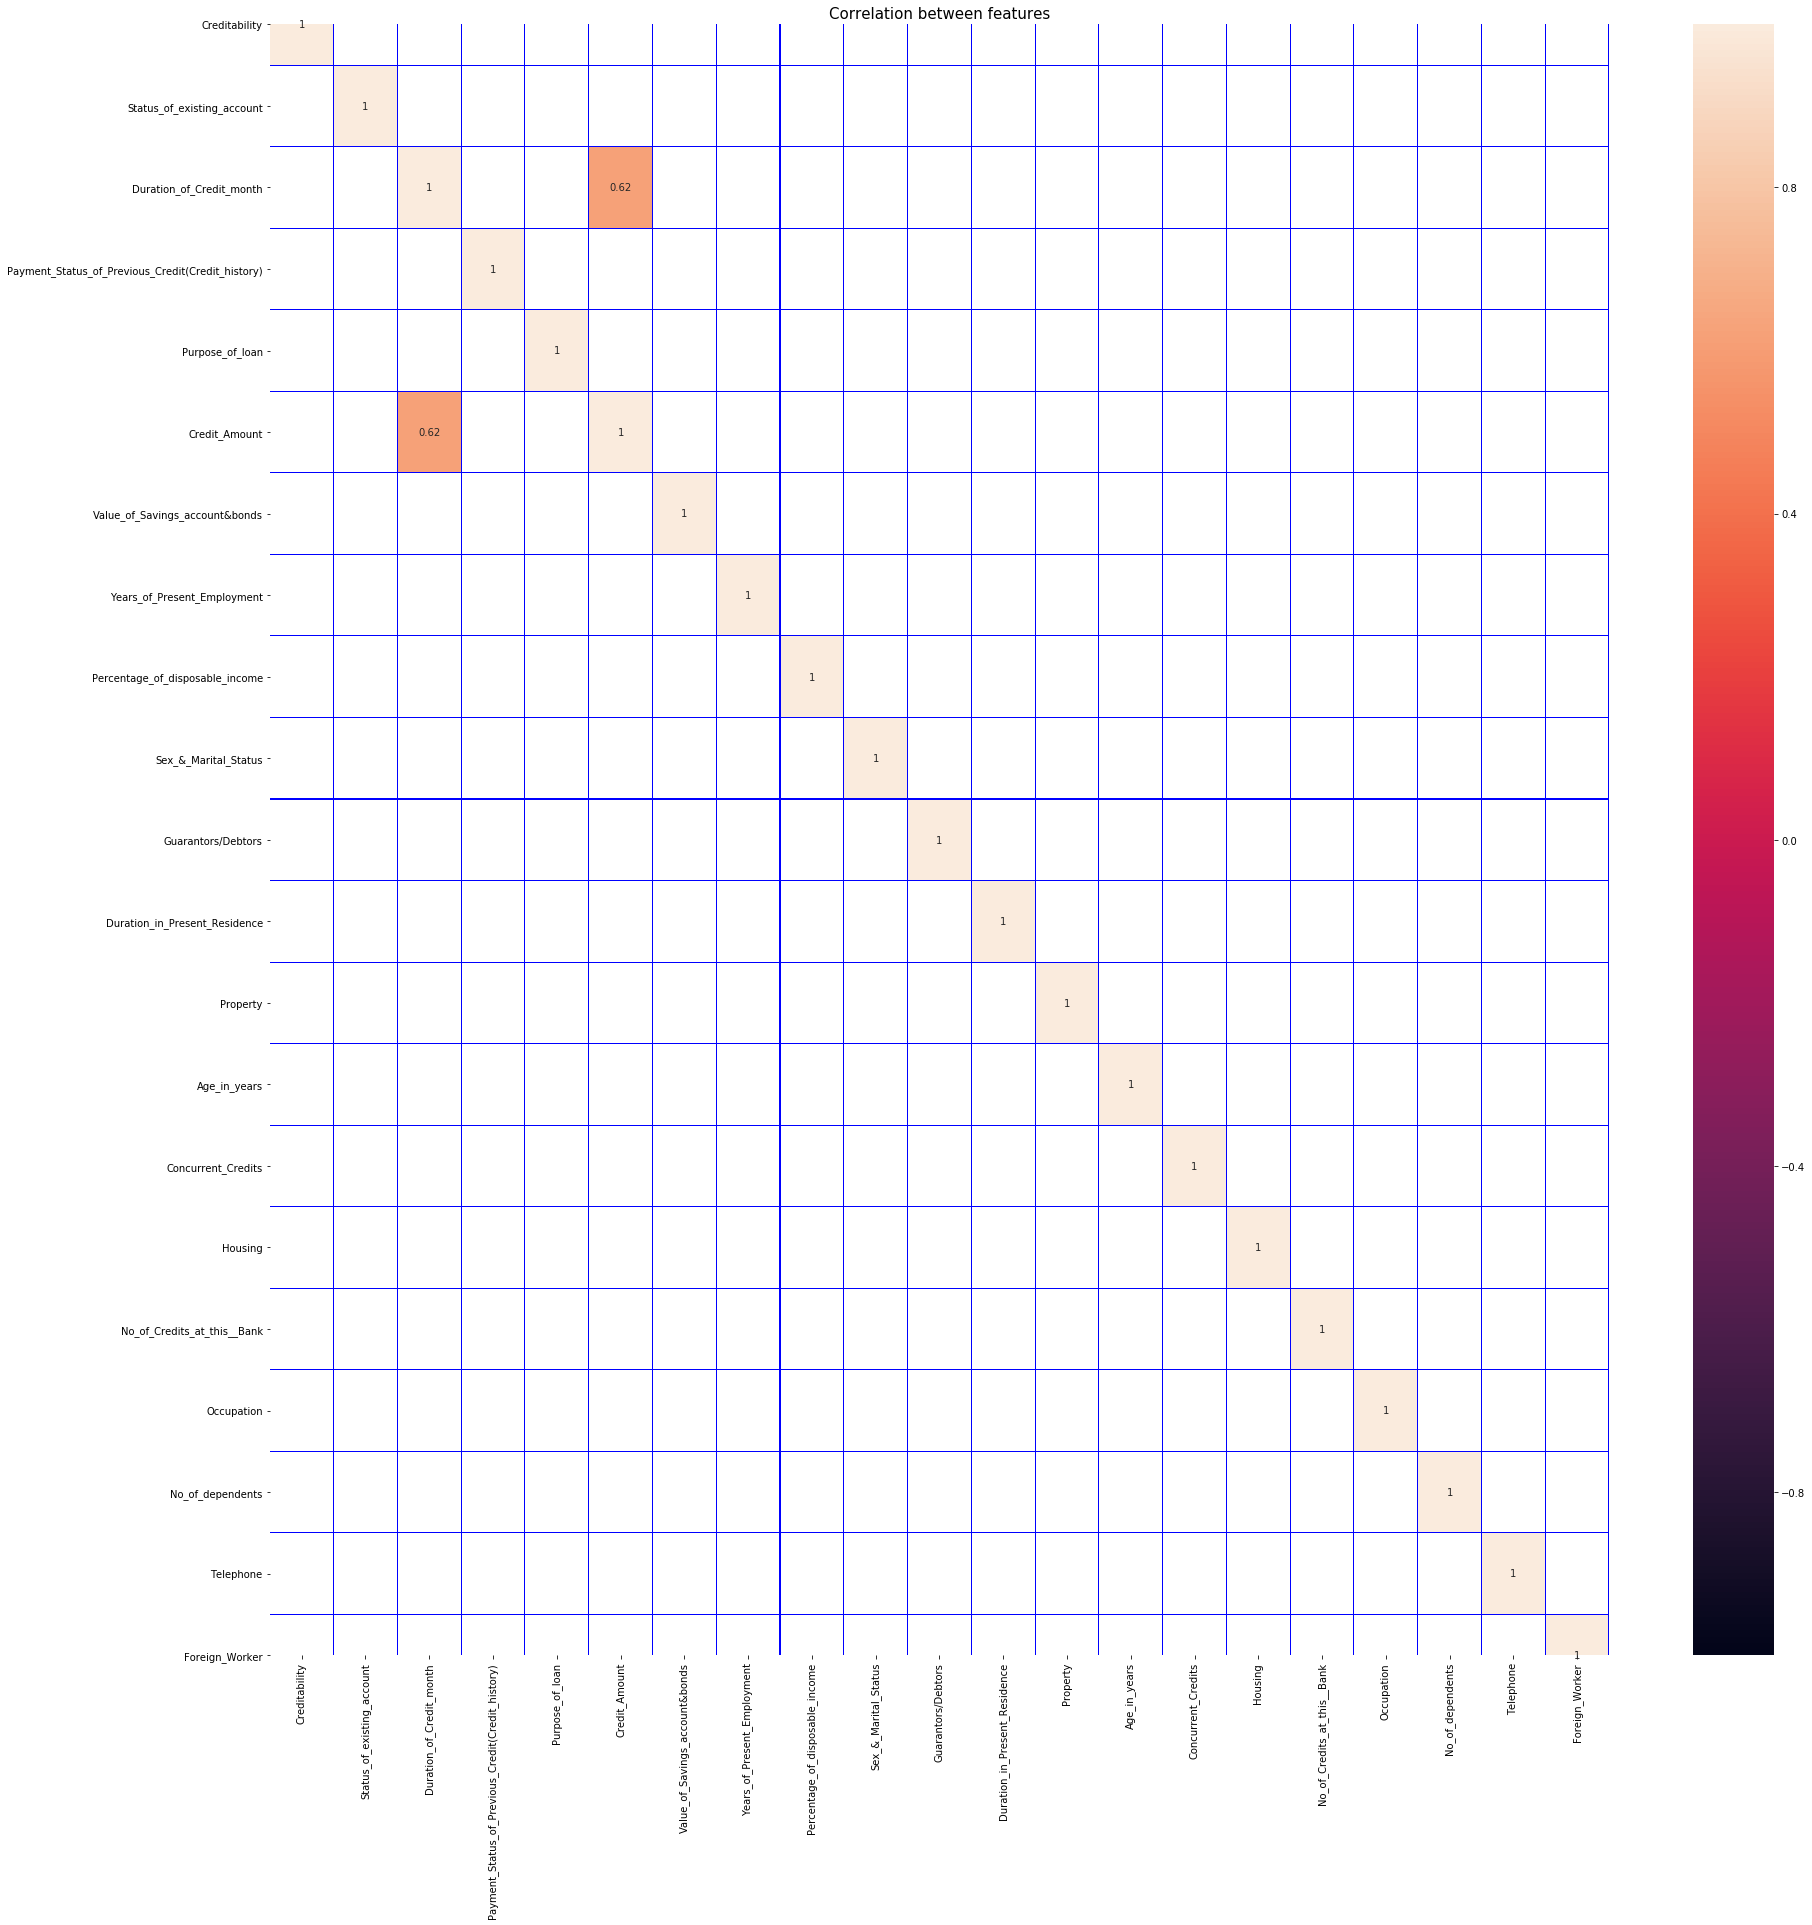

In [16]:
# Checking Correlation and correlation plot
# import matplotlib.pyplot as plt
# import seaborn as sns
correlation=raw_data.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(correlation[(correlation >= 0.5) | (correlation <= -0.5)],
            annot=True,linewidths=.1,linecolor="blue",vmax = 1, vmin = -1)
plt.title('Correlation between features', fontsize=15)
plt.show()

As we can see "Credit_Amount" and "Duration_of_Credit_month" are highly correlated, we need to treat multicollinearity variables. 

<a id='modeling'></a>
# 5. Logistic Regression

<a id='prep_data'></a>
## 5.1 Preparation of Datasets

In [17]:
# Spliting Target Variable
predictor = raw_data.drop('Creditability', axis=1)
target = raw_data[['Creditability']]

In [18]:
predictor.head()

,Status_of_existing_account,Duration_of_Credit_month,Payment_Status_of_Previous_Credit(Credit_history),Purpose_of_loan,Credit_Amount,Value_of_Savings_account&bonds,Years_of_Present_Employment,Percentage_of_disposable_income,Sex_&_Marital_Status,Guarantors/Debtors,Duration_in_Present_Residence,Property,Age_in_years,Concurrent_Credits,Housing,No_of_Credits_at_this__Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,1,1,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,2,1,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,1,1,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,2,1,2
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,1,1,2


In [19]:
target.head()

,Creditability
0,1
1,1
2,1
3,1
4,1


In [31]:
#Let us now split the dataset into train & test
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(predictor, target, test_size = 0.30, random_state=3)
print("x_train ",x_train.shape)
print("x_test ",x_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)

x_train  (700, 20)
x_test  (300, 20)
y_train  (700, 1)
y_test  (300, 1)


<a id='base_model'></a>
## 5.2 Building Logistic Regression Base Model

In [22]:
import statsmodels.api as sm
#Build Logit Model
logit = sm.Logit(y_train,x_train)

# fit the model
model1 = logit.fit()

# Prining Logistic Regression model results 
model1.summary()

Optimization terminated successfully.
         Current function value: 0.480402
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Creditability   No. Observations:                  700
Model:                          Logit   Df Residuals:                      680
Method:                           MLE   Df Model:                           19
Date:                Thu, 05 Dec 2019   Pseudo R-squ.:                  0.1970
Time:                        09:32:57   Log-Likelihood:                -336.28
converged:                       True   LL-Null:                       -418.79
Covariance Type:            nonrobust   LLR p-value:                 2.677e-25
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Status_of_existing_account                            0.4939      0.082      6.056      0.000       0.334       0.654
Duration_of_Credit_month                             -0.0275      0.010     -2.636      0.008      -0.048      -0.007
Payment_Status_of_Previous_Credit(Credit_history)     0.2585      0.105      2.462      0.014       0.053       0.464
Purpose_of_loan                                       0.0277      0.036      0.770      0.441      -0.043       0.098
Credit_Amount                                     -6.028e-05   4.62e-05     -1.305      0.192      -0.000    3.03e-05
Value_of_Savings_account&bonds                        0.2057      0.069      2.983      0.003       0.071       0.341
Years_of_Present_Employment                           0.2084      0.089      2.350      0.019       0.035       0.382
Percentage_of_disposable_income                      -0.4662      0.102     -4.564      0.000      -0.666      -0.266
Sex_&_Marital_Status                                  0.1967      0.143      1.376      0.169      -0.084       0.477
Guarantors/Debtors                                    0.0963      0.198      0.485      0.627      -0.293       0.485
Duration_in_Present_Residence                        -0.1243      0.093     -1.339      0.180      -0.306       0.058
Property                                             -0.2522      0.110     -2.302      0.021      -0.467      -0.037
Age_in_years                                          0.0143      0.011      1.361      0.173      -0.006       0.035
Concurrent_Credits                                    0.1034      0.124      0.833      0.405      -0.140       0.347
Housing                                               0.0873      0.200      0.437      0.662      -0.304       0.479
No_of_Credits_at_this__Bank                          -0.0578      0.192     -0.302      0.763      -0.433       0.318
Occupation                                           -0.0092      0.162     -0.057      0.955      -0.326       0.308
No_of_dependents                                     -0.4558      0.268     -1.701      0.089      -0.981       0.069
Telephone                                             0.1890      0.226      0.838      0.402      -0.253       0.631
Foreign_Worker                                       -0.0316      0.458     -0.069      0.945      -0.930       0.867
=====================================================================================================================
"""

In [32]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()


In [33]:
lr.fit(x_train,y_train)

C:\Users\Ganesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ganesh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
lr.score(x_test,y_test)

0.7666666666666667

In [37]:
# Predict values using test data
y_pred = model1.predict(x_test)

In [38]:
# Making y_pred as DataFrame
predicted_df = pd.DataFrame(y_pred)
predicted_df.head(5)

,0
642,0.572836
762,0.901505
909,0.104238
199,0.859430
586,0.726698


In [39]:
# assigning the class 0 and 1 based on threshold value 0.5
predicted_df['Predicted_Class'] = np.where(predicted_df[0]>= 0.5,1,0)
predicted_df.head(5)

,0,Predicted_Class
642,0.572836,1
762,0.901505,1
909,0.104238,0
199,0.859430,1
586,0.726698,1


# Model Accuracy
We will calculate the model accuracy on the test dataset using ‘score’ function.

In [40]:
# Checking the accuracy with test data
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predicted_df['Predicted_Class']))

0.79


We can see the accuracy of 74%.

### CONFUSION MATRIX

In [24]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predicted_df['Predicted_Class'])
confusion_matrix

array([[ 37,  63],
       [ 15, 185]], dtype=int64)

The results from the confusion matrix are telling us that 37 and 185 are the number of correct predictions. 63 and 15 are the number of incorrect predictions.
# Classification Report
This is another method to examine the performance of classification model.

In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicted_df['Predicted_Class']))

             precision    recall  f1-score   support

          0       0.71      0.37      0.49       100
          1       0.75      0.93      0.83       200

avg / total       0.73      0.74      0.71       300



### ROC Curve

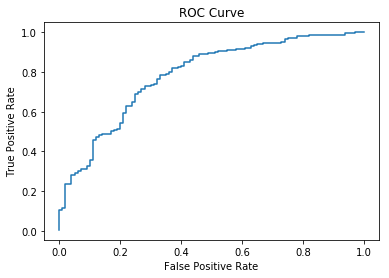

In [26]:
y_pred_prob = model1.predict(x_test)

from sklearn.metrics import roc_curve
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [27]:
# AUC
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,predicted_df['Predicted_Class'])

0.6475

Area Under the Curve is 0.6475

# Decision Tree

In [28]:
# Building a Decision Tree model using 'gini' solver and splitter 'best'
from sklearn.tree import DecisionTreeClassifier

clf_DT1 = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=5, 
                                min_samples_split=2, min_samples_leaf=1)
# Fitting the model
clf_DT1.fit(x_train, y_train)
# Predicting the model
y_pred_DT1 = clf_DT1.predict(x_test)

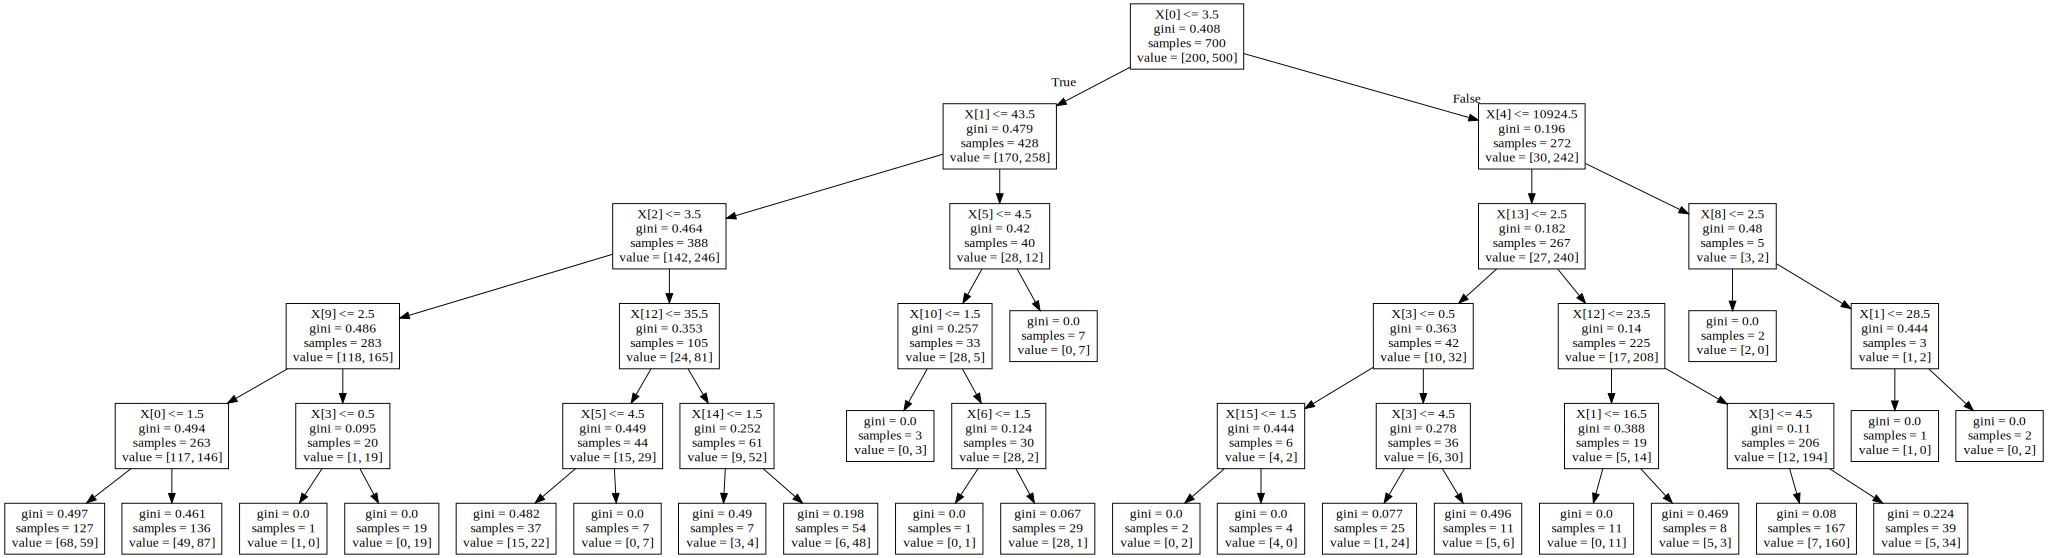

In [29]:
from IPython.display import SVG
from graphviz import Source
from sklearn import tree
graph = Source( tree.export_graphviz(clf_DT1, out_file=None))
SVG(graph.pipe(format='svg'))

In [30]:
cols = ['Model', 'ROC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score']
models_report = pd.DataFrame(columns = cols)
from sklearn import metrics
tmp1 = pd.Series({'Model': " Decision Tree with (GINI & BEST) ",
                 'ROC Score' : metrics.roc_auc_score(y_test, y_pred_DT1),
                 'Precision Score': metrics.precision_score(y_test, y_pred_DT1),
                 'Recall Score': metrics.recall_score(y_test, y_pred_DT1),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_DT1),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred_DT1)})

model_dt1_report = models_report.append(tmp1, ignore_index = True)
model_dt1_report

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,Decision Tree with (GINI & BEST),0.6625,0.758475,0.895,0.74,0.357143


In [31]:
# Building a Decision Tree model using 'gini' solver and splitter 'random'
clf_DT2 = DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=10, 
                                min_samples_split=2, min_samples_leaf=1)
# Fitting the model
clf_DT2.fit(x_train, y_train)
# Predicting the model
y_pred_DT2 = clf_DT2.predict(x_test)

Text(0,0.5,'Frequency')

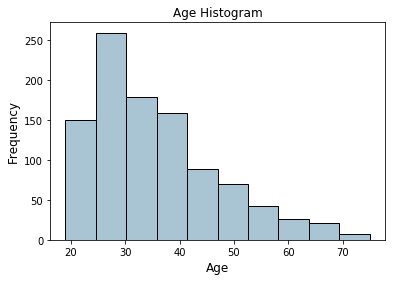

In [32]:
fig, ax = plt.subplots()
raw_data['Age_in_years'].hist(color='#A9C5D3', edgecolor='black',  
                          grid=False)
ax.set_title('Age Histogram', fontsize=12)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [35]:
from sklearn.cross_validation import KFold
crossvalidation = KFold(n=x_train.shape[0], n_folds=10, shuffle=True, random_state=1)
from sklearn.cross_validation import cross_val_score
score = np.mean(cross_val_score(clf_DT2, x_train, y_train, scoring='accuracy', cv=crossvalidation))
score

0.6585714285714286